# Binary classification based on Logistic Regression using non-linear regression function

## import library

In [207]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load data

In [208]:
fname_data1 = 'assignment_09_data1.txt'
fname_data2 = 'assignment_09_data2.txt'

data1 = np.genfromtxt(fname_data1, delimiter=',')
data2 = np.genfromtxt(fname_data2, delimiter=',')
num_data = data1.shape[0]

point_x1 = np.zeros(num_data)
point_y1 = np.zeros(num_data)
label1   = np.zeros(num_data)

point_x2 = np.zeros(num_data)
point_y2 = np.zeros(num_data)
label2   = np.zeros(num_data)

for i in range(num_data):

    point_x1[i]  = data1[i,0]
    point_y1[i]  = data1[i,1]
    label1[i]    = data1[i,2]
    
    point_x2[i]  = data2[i,0]
    point_y2[i]  = data2[i,1]
    label2[i]    = data2[i,2]

## plot the data

## define the feature function for each data to obtain the best accuracy

In [209]:
def feature_function1(x, y):
    feature = np.zeros((1000, 4))
    
    for i in range(3):
        feature[i][0] = x[i] - y[i]
        feature[i][1] = x[i] + y[i]
        feature[i][2] = 3*x[i] + y[i]
        feature[i][3] = -1 * y[i]
    
    
    return feature

In [210]:
def feature_function2(x, y):
    feature = np.zeros((1000, 4))
    
    for i in range(3):
        feature[i][0] = 3 * x[i] - y[i]
        feature[i][1] = x[i] + 2 * y[i]
        feature[i][2] = x[i] - y[i]
        feature[i][3] = x[i]
        
    return feature

## define regression function with a vector $\theta$ model parameters and input data 

In [211]:
#feature은 여기서 하나만 들어오는 거임
def regression_function(theta, feature):
    value = np.matmul(theta, feature)
    
    return value

## define sigmoid function with input $x$

In [212]:
def logistic_function(x):
    z = 1 / (1 + x)
    return z

## define loss function with feature and label based on the logistic regression

In [213]:
def compute_loss_feature(theta, feature, label):
    loss = -1 / feature.shape[0]
    sum = 0
    for i in range(feature.shape[0]):
        x = np.exp(-1 * regression_function(theta, feature[i]))
        sum += label[i] * np.log(logistic_function(x)) + (1 - label[i]) * np.log(1 - logistic_function(x)) 
        
    loss *=sum
    return loss

## define gradient vector for the model parameters $\theta$

In [214]:
def compute_gradient_feature(theta, feature, label):
    gradient = np.zeros(4)
    sum1 = np.zeros(4)
    for i in range(feature.shape[0]):
        x = np.exp(-1 * regression_function(theta, feature[i]))
        sigg = (logistic_function(x) - label[i])
        sum1 += sigg * feature[i]
        
    gradient = sum1 / feature.shape[0]
    
    return gradient

## compute the accuracy

In [317]:
def compute_accuracy(theta, feature, label):
    sum = 0;
    for i in range(1000):
        re = -1 * np.matmul(theta, feature[i])
        exp = np.exp(re)
        lo = logistic_function(exp)
        if lo < 0.5:
            if label[i] == 0:
                sum+=1
        else:
            if label[i] == 1:
                sum+=1
                
    accuracy = sum / 1000
    return accuracy

## gradient descent for the model parameters $\theta$

In [216]:
num_iteration   = 30000         # USE THIS VALUE for the number of gradient descent iterations 
learning_rate   = 0.3           # USE THIS VALUE for the learning rate

theta1           = np.zeros(4)   # USE THIS VALUE for the initial condition of the model parameters
theta1_iteration = np.zeros((num_iteration, 4))
loss1_iteration = np.zeros(num_iteration)

theta2           = np.zeros(4)   # USE THIS VALUE for the initial condition of the model parameters
theta2_iteration = np.zeros((num_iteration, 4))
loss2_iteration = np.zeros(num_iteration)

feature1 = feature_function1(point_x1,point_y1)
feature2 = feature_function1(point_x2,point_y2)

for i in range(num_iteration):
    gradient1 = compute_gradient_feature(theta1, feature1, label1)
    loss1_iteration[i] = compute_loss_feature(theta1, feature1, label1)
    theta1 = theta1 - learning_rate * gradient1
    theta1_iteration[i] = theta1
    
    gradient2 = compute_gradient_feature(theta2, feature2, label2)
    loss2_iteration[i] = compute_loss_feature(theta2, feature2, label2)
    theta2 = theta2 - learning_rate * gradient2
    theta2_iteration[i] = theta2
    
    

In [217]:
#for i in range(1):
    #
    #
    # fill up the function body
    #
    #

theta1_optimal = theta1_iteration[29999]
theta2_optimal = theta2_iteration[29999]

## compute accuracy of the classifiers

In [318]:
accuracy_classifier1 = compute_accuracy(theta1_optimal, feature1, label1)
accuracy_classifier2 = compute_accuracy(theta2_optimal, feature2, label2)

## plot the results

In [219]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('loss')

    plt.plot(loss_iteration, '-', color = 'red')

    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [220]:
def plot_data(data):
    x0 = []
    y0 = []
    x1 = []
    y1 = []
    for i in range(1000):
        if data[i,2] == 0:
            x0.append(data[i,0])
            y0.append(data[i,1])
        else:
            x1.append(data[i,0])
            y1.append(data[i,1])
            
            
    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('training data')
    
    plt.scatter(x0, y0,s = 10, c = 'b', label="class = 0")    
    plt.scatter(x1, y1,s = 10, c = 'r', label="class = 1")
    plt.axis('equal')
    
    plt.legend()
    plt.tight_layout()
    plt.show()

In [221]:

def plot_model_parameter(theta_iteration):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.figure(figsize=(8,6))
    plt.title('model parameter')
    theta_iteration_T = theta_iteration.T
    plt.plot(theta_iteration_T[0], '-', color = 'red', label="theta0")
    plt.plot(theta_iteration_T[1], '-', color = 'green', label = "theta1")
    plt.plot(theta_iteration_T[2], '-', color = 'blue', label = "theta2")
    plt.plot(theta_iteration_T[3], '-', color = 'yellow', label = "theta3")
    
    plt.xlabel('iteration')
    plt.legend()

    plt.tight_layout()
    plt.show()

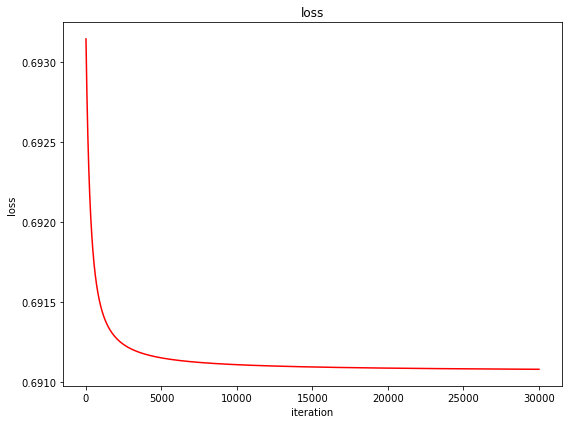

In [222]:
plot_loss_curve(loss1_iteration)

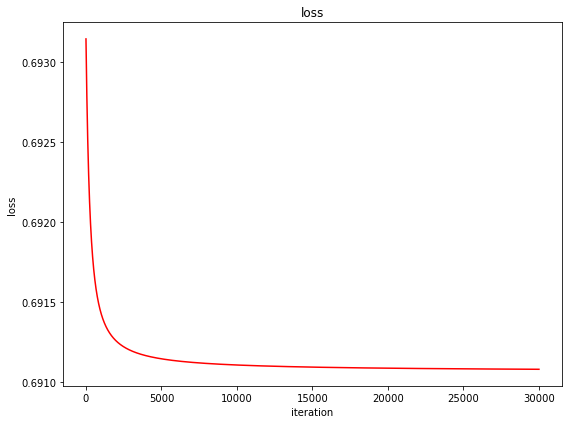

In [223]:
plot_loss_curve(loss2_iteration)

<Figure size 576x432 with 0 Axes>

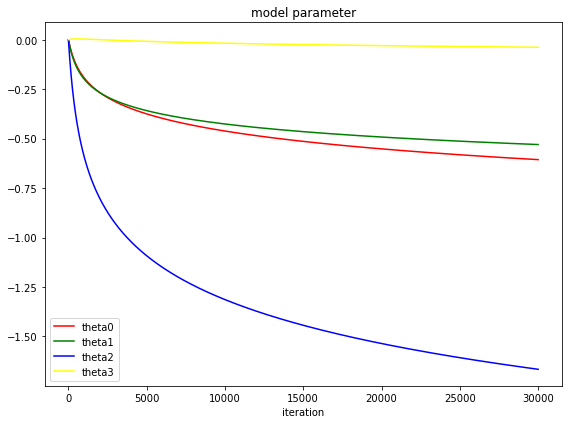

In [224]:
plot_model_parameter(theta1_iteration)

<Figure size 576x432 with 0 Axes>

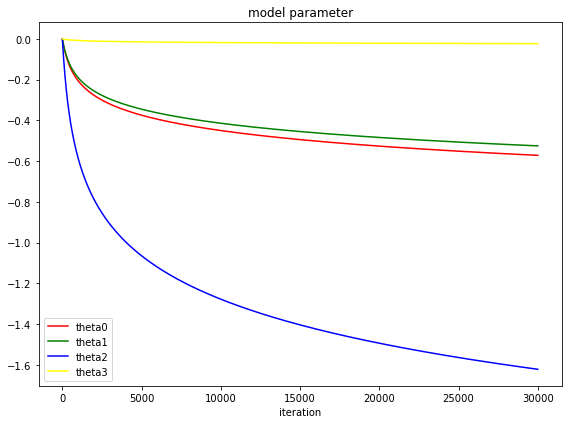

In [225]:
plot_model_parameter(theta2_iteration)

In [271]:
def plot_classifier1(data, theta):
    
    f = np.zeros(680)
    xx = []
    for i in range(1000):
        to = (data[i,0] * (theta[0] + theta[1] + theta[2] * 3) / (theta[0] - theta[1] - theta[2] + theta[3]))
        if(to < 4.7 and to > -4.7):
            xx.append(data[i,0])
            
    print(len(xx))
    for i in range(680):
        f[i] = xx[i] * (theta[0] + theta[1] + theta[2] * 3) / (theta[0] - theta[1] - theta[2] + theta[3])
    x0 = []
    y0 = []
    x1 = []
    y1 = []
    for i in range(1000):
        if data[i,2] == 0:
            x0.append(data[i,0])
            y0.append(data[i,1])
        else:
            x1.append(data[i,0])
            y1.append(data[i,1])
    
    x = np.zeros(1000)
    y = np.zeros(1000)
    for i in range(1000):
        x[i]  = data[i,0]
        y[i]  = data[i,1]

    x_1, y_1 = np.meshgrid(x, y)
    ellipse = (theta[0] *(x_1 - y_1) + theta[1] * (x_1 + y_1) + theta[2] * (3 * x_1 + y_1) - theta[3]*y_1)
    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    cm = plt.cm.get_cmap('RdBu')
    plt.scatter(x_1, y_1, 100, ellipse, cmap=cm)

    plt.colorbar()

    plt.scatter(x0, y0,s = 5, c = 'b', label = "class = 0")    
    plt.scatter(x1, y1,s = 5, c = 'r', label = "class = 1")
    plt.plot(xx, f, '-', color = 'black')

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [313]:
def plot_classifier2(data, theta):
    
    f = np.zeros(264)
    xx = []
    for i in range(1000):
        to = (data[i,0] * (3 * theta[0] + theta[1] + theta[2] + theta[3])) / (theta[0] - (2 * theta[1]) + theta[2])
        if(to < 1.4 and to > -0.9):
            xx.append(data[i,0])
            
    print(len(xx))
    for i in range(264):
        f[i] = (xx[i] * (3 * theta[0] + theta[1] + theta[2] + theta[3])) / (theta[0] - (2 * theta[1]) + theta[2])
        
    x0 = []
    y0 = []
    x1 = []
    y1 = []
    for i in range(1000):
        if data[i,2] == 0:
            x0.append(data[i,0])
            y0.append(data[i,1])
        else:
            x1.append(data[i,0])
            y1.append(data[i,1])
    
    x = np.zeros(1000)
    y = np.zeros(1000)
    for i in range(1000):
        x[i]  = data[i,0]
        y[i]  = data[i,1]

    x_1, y_1 = np.meshgrid(x, y)
    ellipse = (theta[0] *(3 *x_1 - y_1) + theta[1] * (x_1+ 2 * y_1) + theta[2] * (x_1 - y_1)+theta[3]*x_1)
    plt.figure(figsize=(10,6)) # USE THIS VALUE for the size of the figure
    cm = plt.cm.get_cmap('RdBu')
    plt.scatter(x_1, y_1, 150, ellipse, cmap=cm)

    plt.colorbar()

    plt.scatter(x0, y0,s = 5, c = 'b', label = "class = 0")    
    plt.scatter(x1, y1,s = 5, c = 'r', label = "class = 1")
    plt.plot(xx, f, '-', color = 'black')

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()

680


<ipython-input-271-d719640abe9d>:45: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


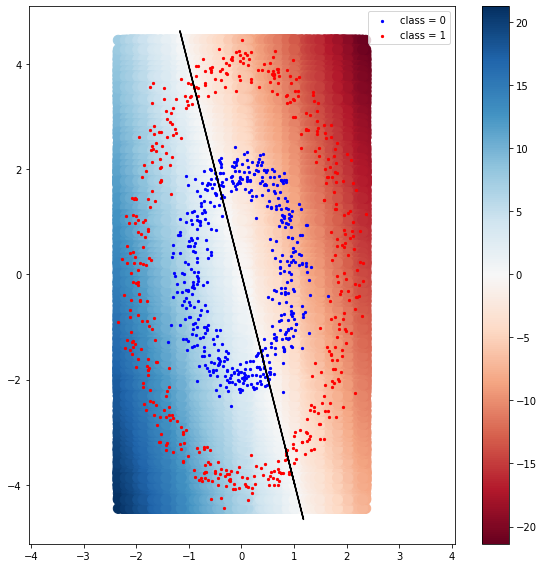

In [272]:
plot_classifier1(data1, theta1_optimal)

264


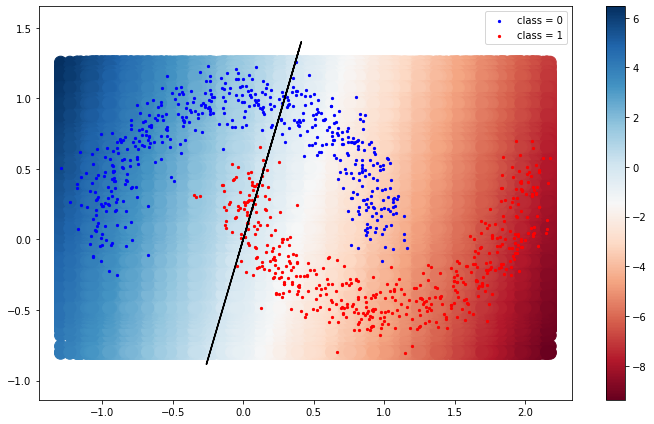

In [314]:
plot_classifier2(data2, theta2_optimal)

# * results

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

### # 01. plot the input data (data1) from the file [assignment_09_data1.txt] in blue for class 0 and in red for class 1

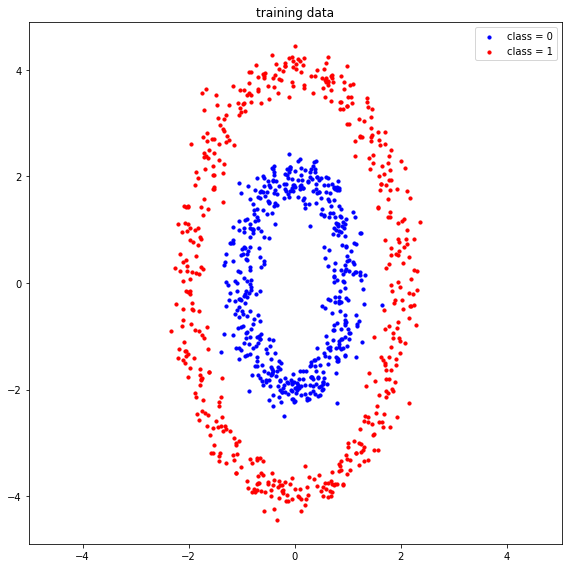

In [230]:
plot_data(data1)

### # 02. plot the input data (data2) from the file [assignment_09_data2.txt] in blue for class 0 and in red for class 1

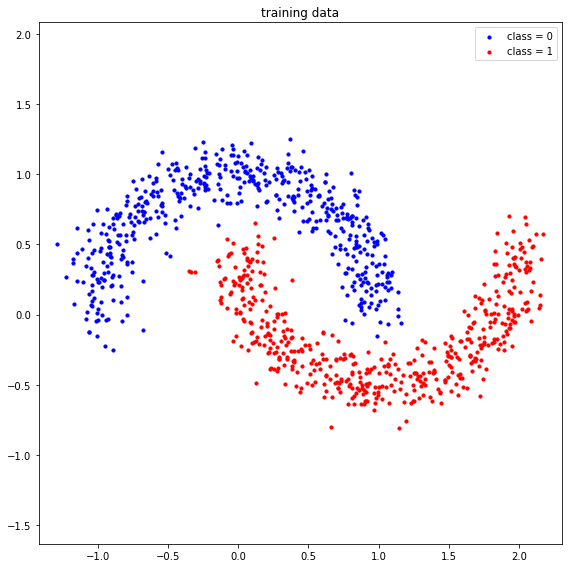

In [231]:
plot_data(data2)

### # 03. plot the values of the model parameters $\theta$ as curves over the gradient descent iterations using different colors for data1

<Figure size 576x432 with 0 Axes>

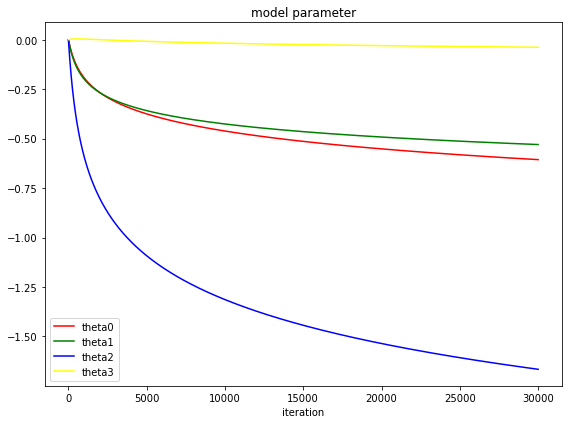

In [232]:
plot_model_parameter(theta1_iteration)

### # 04. plot the values of the model parameters $\theta$ as curves over the gradient descent iterations using different colors for data2

<Figure size 576x432 with 0 Axes>

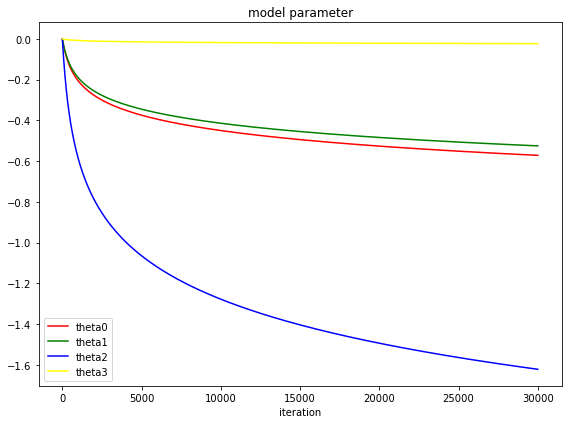

In [233]:
plot_model_parameter(theta2_iteration)

### # 05. plot the loss values in red curve over the gradient descent iterations for data1

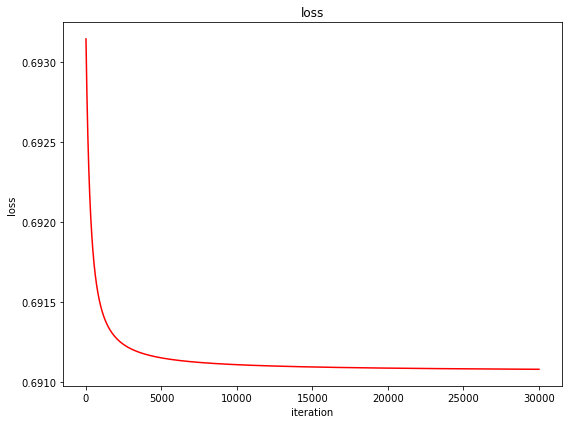

In [234]:
plot_loss_curve(loss1_iteration)

### # 06. plot the loss values in red curve over the gradient descent iterations for data2

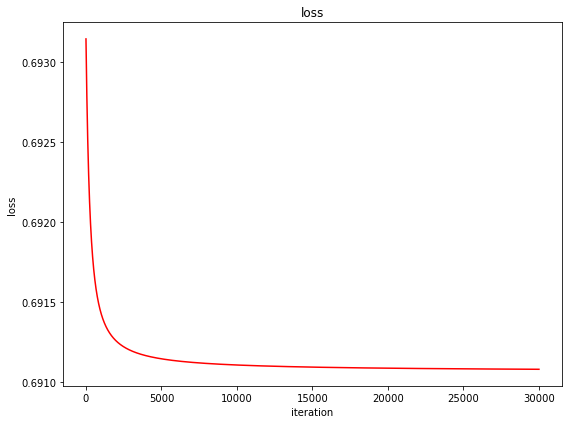

In [235]:
plot_loss_curve(loss2_iteration)

### # 07. plot the classifier with the given data points superimposed for data1

680


<ipython-input-271-d719640abe9d>:45: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


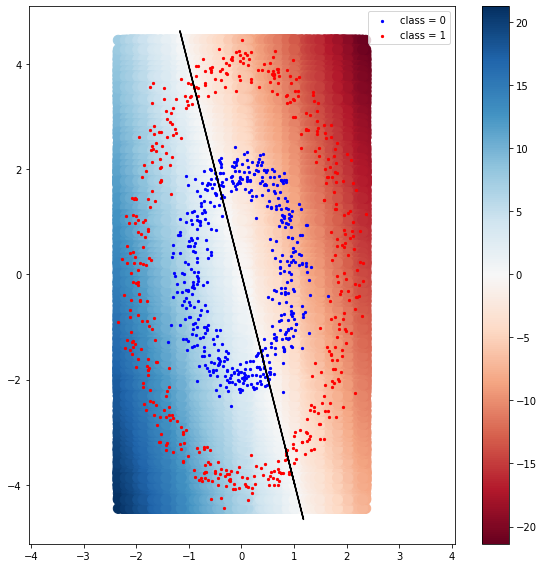

In [315]:
plot_classifier1(data1, theta1_optimal)

### # 08. plot the classifier with the given data points superimposed for data2

264


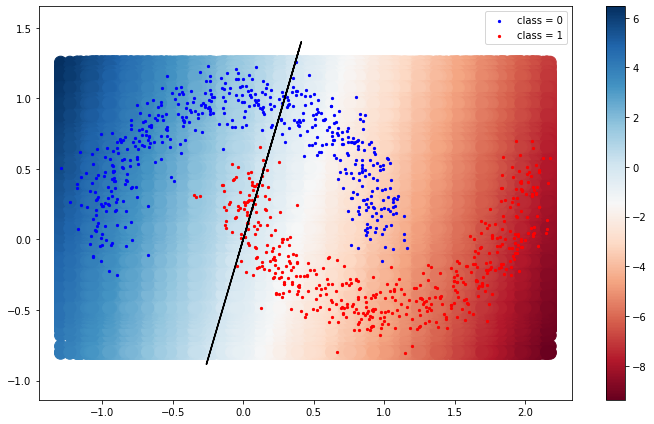

In [316]:
plot_classifier2(data2, theta2_optimal)

### # 09. print out the accuracy of the obtained classifier1 for data1

In [319]:
print(accuracy_classifier1)

0.503


### # 10. print out the accuracy of the obtained classifier2 for data1

In [320]:
print(accuracy_classifier2)

0.503
